### 1. a) Import the necessary libraries.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

### b) Read the CSV files to explore the data.

In [5]:
dfDesc = pd.read_csv(r'./AS24_Data_Description.csv',header =0,sep=';')
dfData = pd.read_csv(r'./AS24_Case_Study_Data.csv',header =0,sep=';') 

### 2. Exploratory data analysis 
#### Result - The data consists of 78,321 rows with 12 columns(10 numerical and 2 categorical). There are 3 different product tiers namely - Basic, Premium and Plus. Out of 78,321 articles,  75421 represents Basic tier, 2324  represent Premium tier and 576 represent Plus tier. This indicates <u>imbalanced dataset </u>. There are five columns with object datatype format. We will preprocess these columns to convert them into datetime and numeric datatype format.


### a) Basic exploratory data analysis

In [6]:
### Description of all the columns of the dataset.
dfData.describe(include='all')

,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr
count,7.832100e+04,78321,78321,78321.000000,78321.000000,78321.000000,78321,78321,78311.000000,78311.000000,78321.000000,78297
unique,NaN,3,91,NaN,NaN,NaN,35,273,NaN,NaN,NaN,47246
top,NaN,Basic,Volkswagen,NaN,NaN,NaN,16.11.18,01.12.18,NaN,NaN,NaN,0.0
freq,NaN,75421,9430,NaN,NaN,NaN,3442,947,NaN,NaN,NaN,1244
mean,3.574869e+08,NaN,NaN,15067.655316,4.632117,2011.089465,NaN,NaN,2297.502522,93.469870,35.986262,NaN
std,5.076572e+06,NaN,NaN,16374.497606,2.354275,6.538395,NaN,NaN,6339.034423,228.025588,32.214835,NaN
min,3.472324e+08,NaN,NaN,1.000000,1.000000,1924.000000,NaN,NaN,0.000000,0.000000,-3.000000,NaN
25%,3.536387e+08,NaN,NaN,5750.000000,3.000000,2008.000000,NaN,NaN,367.000000,13.000000,10.000000,NaN
50%,3.585480e+08,NaN,NaN,10900.000000,5.000000,2013.000000,NaN,NaN,920.000000,36.000000,25.000000,NaN
75%,3.614817e+08,NaN,NaN,18890.000000,7.000000,2015.000000,NaN,NaN,2234.000000,94.000000,55.000000,NaN


In [7]:
### Identifies the number of rows and columns
dfData.shape

(78321, 12)

In [8]:
### Get the unique count of records for different columns.
dfData.nunique()

article_id                 78305
product_tier                   3
make_name                     91
price                       5852
first_zip_digit                9
first_registration_year       87
created_date                  35
deleted_date                 273
search_views               10390
detail_views                1438
stock_days                   131
ctr                        47246
dtype: int64

In [9]:
### Identify the datatype of each column in the dataset
dfData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78321 entries, 0 to 78320
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   article_id               78321 non-null  int64  
 1   product_tier             78321 non-null  object 
 2   make_name                78321 non-null  object 
 3   price                    78321 non-null  int64  
 4   first_zip_digit          78321 non-null  int64  
 5   first_registration_year  78321 non-null  int64  
 6   created_date             78321 non-null  object 
 7   deleted_date             78321 non-null  object 
 8   search_views             78311 non-null  float64
 9   detail_views             78311 non-null  float64
 10  stock_days               78321 non-null  int64  
 11  ctr                      78297 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 7.2+ MB


In [10]:
###Identify different types of Product tier and their distribution
dfData['product_tier'].value_counts()

Basic      75421
Premium     2324
Plus         576
Name: product_tier, dtype: int64

### b) Data preprocessing - created_date and deleted_date column field are converted to datetime format. The column 'ctr' is converted into numeric format with errrors marked as na.

In [11]:
## Data preprocessing
## The column - ctr is an object and is converted to numeric data type
## It has a value '27.624.309.392.265.100' which could not be converted from string to float which is filled as na
#The column 'created_date' and 'deleted_date' dates are converted to datetime format
dfData['ctr'] = pd.to_numeric(dfData['ctr'], errors='coerce')
dfData['created_date'].replace('.','-',inplace=True)
dfData['deleted_date'].replace('.','-',inplace=True)

dfData['created_date'] = pd.to_datetime(dfData['created_date'], errors = 'coerce')
dfData['deleted_date'] = pd.to_datetime(dfData['deleted_date'], errors = 'coerce')

### c) Missing value analysis 
#### Result - There are 10 missing values each in search_views and detail_views column. There are 106 missing values in ctr column.
#### The missing values are dropped from the dataset as part of data preprocessing.

In [12]:
### Missing value analysis
dfData.isnull().values.any()
dfData.isnull().sum()

article_id                   0
product_tier                 0
make_name                    0
price                        0
first_zip_digit              0
first_registration_year      0
created_date                 0
deleted_date                 0
search_views                10
detail_views                10
stock_days                   0
ctr                        106
dtype: int64

In [13]:
dfData.dropna(inplace=True)
dfData.isnull().values.any()
dfData.isnull().sum()

article_id                 0
product_tier               0
make_name                  0
price                      0
first_zip_digit            0
first_registration_year    0
created_date               0
deleted_date               0
search_views               0
detail_views               0
stock_days                 0
ctr                        0
dtype: int64

### d) Duplicate value analysis 
#### Result - There are no duplicated records in the dataset.

In [14]:
duplicates = dfData.duplicated()
print(duplicates.sum())

0


### e) Univariate analysis of Categorical and Numerical columns


<AxesSubplot:title={'center':'Freq dist of Product tier'}>

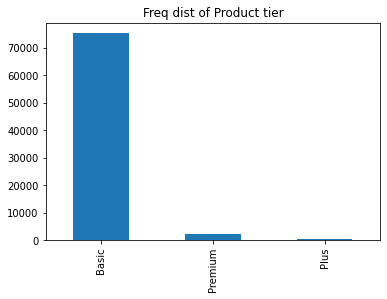

In [15]:
dfData['product_tier'].value_counts().plot.bar(title='Freq dist of Product tier')

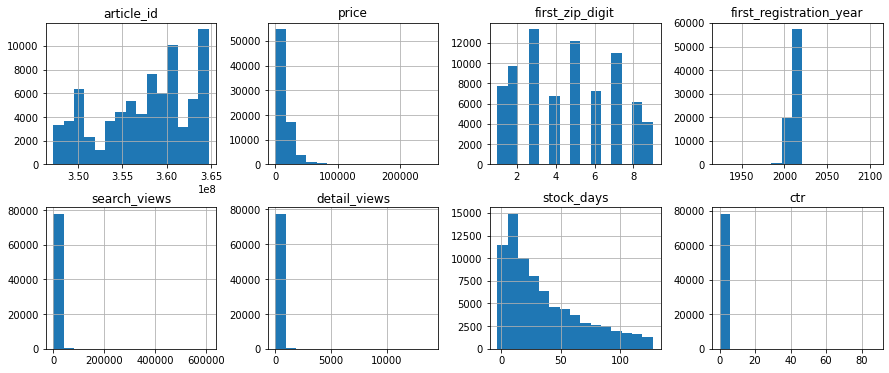

In [16]:
dfData.hist(bins=15, figsize=(15, 6), layout=(2, 4));

### f) Correlation in the dataset

In [17]:
dfData.corr()

,article_id,price,first_zip_digit,first_registration_year,search_views,detail_views,stock_days,ctr
article_id,1.000000,0.012255,0.007807,0.026235,0.026658,0.034604,-0.001999,-0.002463
price,0.012255,1.000000,-0.034360,0.311886,0.003028,0.028898,0.085867,-0.002355
first_zip_digit,0.007807,-0.034360,1.000000,-0.016857,-0.008756,-0.006002,-0.039132,-0.000174
first_registration_year,0.026235,0.311886,-0.016857,1.000000,-0.110261,-0.122651,0.081787,-0.008580
search_views,0.026658,0.003028,-0.008756,-0.110261,1.000000,0.835638,0.271594,-0.008138
detail_views,0.034604,0.028898,-0.006002,-0.122651,0.835638,1.000000,0.281612,0.010797
stock_days,-0.001999,0.085867,-0.039132,0.081787,0.271594,0.281612,1.000000,-0.022017
ctr,-0.002463,-0.002355,-0.000174,-0.008580,-0.008138,0.010797,-0.022017,1.000000


### g) Bivariate analysis of numerical columns using Seaborn pair plot.

#### There seems to be a relation between detail_views with price, search_views and stock_days

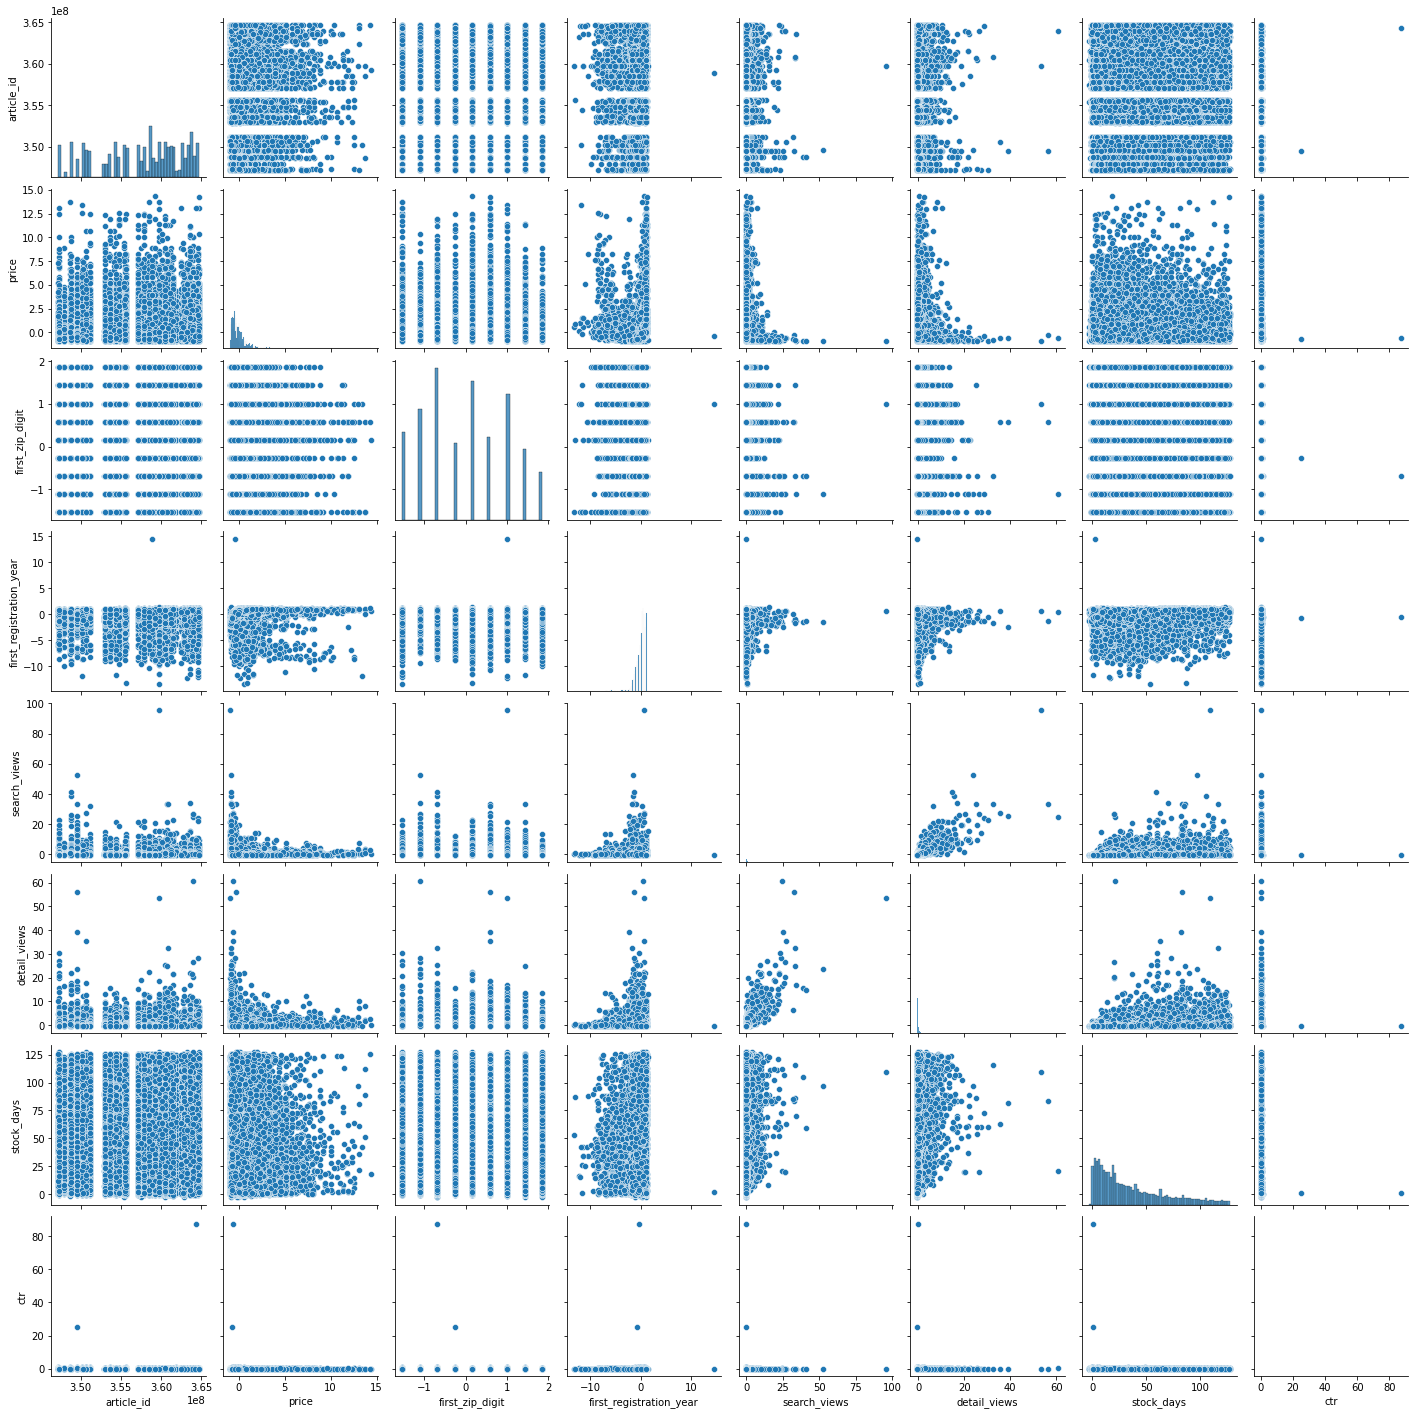

In [265]:
sns.pairplot(dfData)

### h) Data scaling

In [18]:
from sklearn.preprocessing import StandardScaler
stdScale = StandardScaler()

In [85]:
# Feature Scaling - Standardization of the data since the scale of data varies in the entire dataset.
dfData['price'] = stdScale.fit_transform(dfData[['price']])
dfData['search_views'] = stdScale.fit_transform(dfData[['search_views']])
dfData['detail_views'] = stdScale.fit_transform(dfData[['detail_views']])
dfData['first_zip_digit'] = stdScale.fit_transform(dfData[['first_zip_digit']])
dfData['first_registration_year'] = stdScale.fit_transform(dfData[['first_registration_year']])
dfData['ctr'] = stdScale.fit_transform(dfData[['ctr']])
dfData['stock_days'] = stdScale.fit_transform(dfData[['stock_days']])
dfData['created_date'] = stdScale.fit_transform(dfData[['created_date']])
dfData['deleted_date'] = stdScale.fit_transform(dfData[['deleted_date']])
dfData.head()
dfData.describe()

,article_id,product_tier,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,...,make_Suzuki,make_TVR,make_Tata,make_Tesla,make_Toyota,make_Triumph,make_Trucks-Lkw,make_Volkswagen,make_Volvo,make_smart
count,7.821500e+04,78215.000000,7.821500e+04,7.821500e+04,7.821500e+04,7.821500e+04,7.821500e+04,7.821500e+04,7.821500e+04,7.821500e+04,...,78215.000000,78215.000000,78215.000000,78215.000000,78215.000000,78215.000000,78215.000000,78215.000000,78215.000,78215.000000
mean,3.574862e+08,1.044365,-8.721102e-18,2.920661e-17,-3.633793e-18,-7.085896e-18,4.542241e-18,1.453517e-17,6.631672e-18,2.652669e-17,...,0.016774,0.000013,0.000013,0.001074,0.050105,0.000486,0.000230,0.120348,0.051,0.002340
std,5.076987e+06,0.238903,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,...,0.128426,0.003576,0.003576,0.032754,0.218164,0.022037,0.015169,0.325370,0.220,0.048314
min,3.472324e+08,1.000000,-9.170168e-01,-1.542720e+00,-1.333004e+01,-1.920688e+00,-2.203927e+00,-3.622561e-01,-4.098929e-01,-1.210505e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
25%,3.536387e+08,1.000000,-5.690496e-01,-6.932649e-01,-4.730867e-01,-4.877994e-01,-4.716957e-01,-3.043812e-01,-3.529065e-01,-8.068937e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
50%,3.585479e+08,1.000000,-2.541088e-01,1.561905e-01,2.922084e-01,-9.119631e-02,1.226976e-01,-2.173323e-01,-2.520843e-01,-3.411885e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
75%,3.614817e+08,1.000000,2.331063e-01,1.005646e+00,5.983264e-01,9.322955e-01,5.132989e-01,-1.011821e-02,2.162895e-03,5.902219e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000
max,3.647040e+08,3.000000,1.433481e+01,1.855101e+00,1.452670e+01,1.252137e+00,3.689057e+00,9.563639e+01,6.063574e+01,2.825607e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000,1.000000


### i) One hot encoding for categorical features

In [20]:
###One hot encoding for categorical columns since Machine learning algorithms work on numeric data.
dummies= pd.get_dummies(dfData[["make_name"]],columns=['make_name'],prefix=['make'],drop_first=True)
dummies.head()

#Concatenate the dummies with the dataset
dfData = pd.concat([dfData,dummies],axis=1)
dfData.drop(columns='make_name',axis=1,inplace=True)
dfData.head()

,article_id,product_tier,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,...,make_Suzuki,make_TVR,make_Tata,make_Tesla,make_Toyota,make_Triumph,make_Trucks-Lkw,make_Volkswagen,make_Volvo,make_smart
0,350625839,Basic,0.102466,0.156191,0.292208,-0.538974,-0.267904,0.125028,0.129287,-0.185953,...,0,0,0,0,0,0,0,0,0,0
1,354412280,Basic,1.274566,-0.268537,0.598326,-0.244720,-0.650014,0.155306,0.567644,0.497081,...,0,0,0,0,0,0,0,0,0,0
2,349572992,Basic,-0.190559,-0.693265,-2.003677,-0.641323,-1.176476,0.149629,0.751754,0.466034,...,0,0,0,0,0,0,0,0,0,0
3,350266763,Basic,-0.813237,0.580918,-1.238382,-0.590149,0.292524,-0.069728,-0.295920,2.018384,...,0,0,0,0,0,0,0,0,0,0
4,355688985,Basic,0.697673,-0.693265,0.445267,-0.091196,-0.395274,-0.285142,-0.322221,-0.744800,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# create dictionary for Product tiers
tiers = {'Basic':1,'Premium':2,'Plus':3}
# apply using map
dfData['product_tier'] = dfData.product_tier.map(tiers)

In [22]:
print(dfData['product_tier'].value_counts())

1    75319
2     2322
3      574
Name: product_tier, dtype: int64


### j) Multiclass classification -  Decision tree algorithm for training the model

In [87]:
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix,accuracy_score,precision_recall_fscore_support
### Initializing the feature and target columns with X and Y

X = dfData[dfData.columns.difference(['product_tier','article_id'])]
y = dfData['product_tier']
 
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 

# training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier 
classifier = DecisionTreeClassifier(criterion = 'entropy',random_state = 0,class_weight='balanced')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
#Calculating the Accuracy, precision, recall and F1 score
acc = accuracy_score(y_test,y_pred)
print(acc)
print(cm)
precision_recall_fscore_support(y_test, y_pred)

0.9529508029047765
[[18359   311   165]
 [  304   263    20]
 [   95    25    12]]


(array([0.97872908, 0.43906511, 0.06091371]),
 array([0.9747279 , 0.44804089, 0.09090909]),
 array([0.97672439, 0.44350759, 0.07294833]),
 array([18835,   587,   132], dtype=int64))

In [88]:
###Feature importances
for name, importance in zip(X.columns, classifier.feature_importances_):
    print(name, importance)

created_date 0.048804618399523256
ctr 0.06664127606330715
deleted_date 0.08338625265380184
detail_views 0.06033170598847493
first_registration_year 0.04559245257300329
first_zip_digit 0.048746141888373035
make_Abarth 5.840050668772365e-05
make_Aixam 0.0
make_Alfa Romeo 9.218842306491308e-18
make_Alpina 0.0
make_Alpine 0.0
make_Amphicar 0.0
make_Aston Martin 4.663648726503168e-19
make_Audi 0.0038093289989150018
make_Austin 0.0
make_BMW 0.003620235537412149
make_Bentley 3.635470616950678e-05
make_Buick 0.0
make_Cadillac 3.5789444544718655e-05
make_Caravans-Wohnm 0.0
make_Casalini 0.0
make_Chatenet 0.0
make_Chevrolet 0.0021159668557273474
make_Chrysler 0.0
make_Citroen 0.004410593666013958
make_Corvette 0.0
make_DFSK 0.0
make_DS Automobiles 0.0022599681593277144
make_Dacia 0.001601516674410124
make_Daewoo 0.0
make_Daihatsu 3.154286504372853e-05
make_Daimler 0.0
make_De Tomaso 0.0
make_Dodge 0.00017915915382731284
make_Donkervoort 0.0
make_FISKER 8.4446631671719945e-19
make_Ferrari 8.40888

### <u>SOLUTION 1 </u>- Yes, it is possible to predict the product_tier based on the other features (columns in csv) using Multiclass classification algorithm. A decision tree classifier is used above to train the model. The resulting model has 95.2% accuracy approximately. There are other algorithms as well which can be used to predict the product_tier such as Random Forest Classification, Support Vector Machine etc. 

### h) Linear Regression model to predict detail_views from other feature columns

In [105]:
X_reg = dfData[dfData.columns.difference(['detail_views','article_id'])]
y_reg = dfData['detail_views']
 
# dividing X, y into train and test data 
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, random_state = 0) 

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train_reg, y_train_reg) #training the algorithm
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)
y_pred_reg = regressor.predict(X_test_reg)
y_test_reg.shape

-0.016397575493881822
[ 7.42873243e-03  1.33522090e-02  7.76646694e-03 -3.34856655e-02
  3.87279487e-03  2.61160419e-01  3.31479742e-03  2.07455756e-01
  8.42179731e-01  3.53183439e-01 -5.92303984e-14  3.79052972e-01
  2.21002296e-01 -2.63237364e-01  1.80276685e-01  3.26570142e-01
  5.75596142e-01  4.02509472e-01 -5.76792268e-03 -3.18391803e-01
  3.33132910e-01  1.92309389e-02  1.82789247e-01  1.66752150e-02
 -3.84323615e-01 -8.49320614e-15  3.49743567e-02  1.44392192e-02
 -6.25782996e-02 -3.93820722e-02  6.26939058e-01  1.96758553e-01
 -1.19369227e-01 -1.08246745e-14  2.38417400e+00  1.02462545e+00
  2.12819798e-02  2.62238726e-02  3.44330747e-01 -3.21613546e-02
  2.01984037e+00  6.60175769e-02  1.95103477e-02  3.77581764e-01
  2.16575227e-01  6.46915395e-02  2.31310819e-01  2.75789926e-01
 -1.29400174e-01 -5.14640383e-02  3.11382467e-02  1.15849818e+00
  1.42876087e-01  2.35964168e-01  1.86272581e-01  1.37264081e-02
  7.25153191e-01  1.18997191e+00 -3.12250226e-15  1.42222782e-01
  6

(19554,)

In [106]:
df = pd.DataFrame({'Actual': y_test_reg, 'Predicted': y_pred_reg})
df

,Actual,Predicted
3615,-0.352906,-0.127708
63915,-0.129344,-0.129332
44290,-0.339756,-0.315280
3860,-0.330989,-0.154810
52463,-0.392359,-0.322410
...,...,...
21123,-0.409893,0.957374
22826,-0.168796,-0.069580
35393,-0.177564,-0.366037
16233,-0.199481,-0.227210


In [107]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_reg, y_pred_reg))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_reg, y_pred_reg))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_reg, y_pred_reg)))

Mean Absolute Error: 0.19215717210698416
Mean Squared Error: 0.3319384690559992
Root Mean Squared Error: 0.5761410149052046


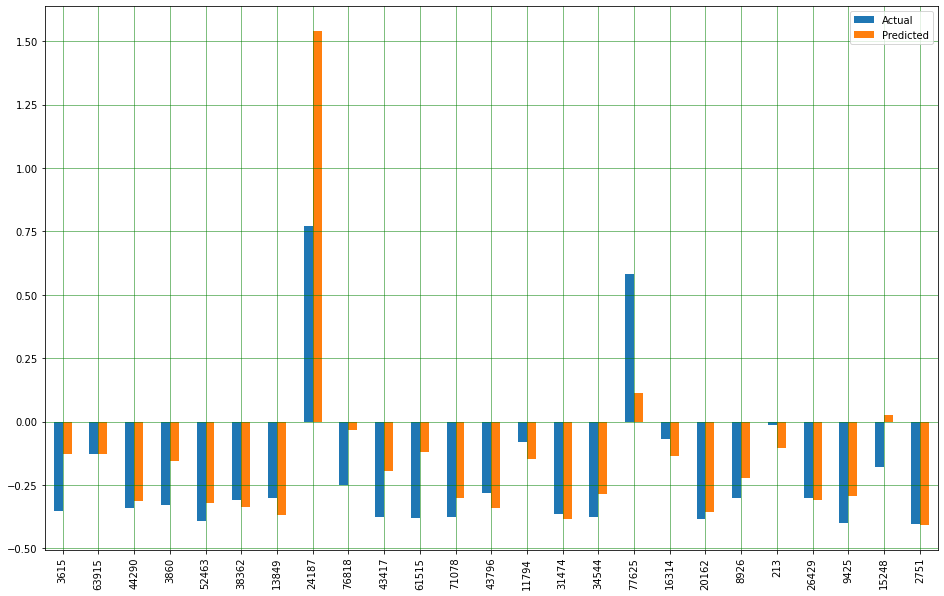

In [108]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### <u>Solution 2</u> - Yes, we can predict the detail_views value based on other columns using regression. We can interpret that around 58% of dependent variability can be explain by the above model using R-squared value. 